In [1]:
from sklearn.linear_model import LinearRegression, Ridge
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [45]:
data = pd.read_csv('data/longley.csv').drop(columns='Population')
x = data.drop('Employed', axis=1)
y = data.Employed
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)

MSE train  0.02970250872085122
MSE test  0.10030357182876398


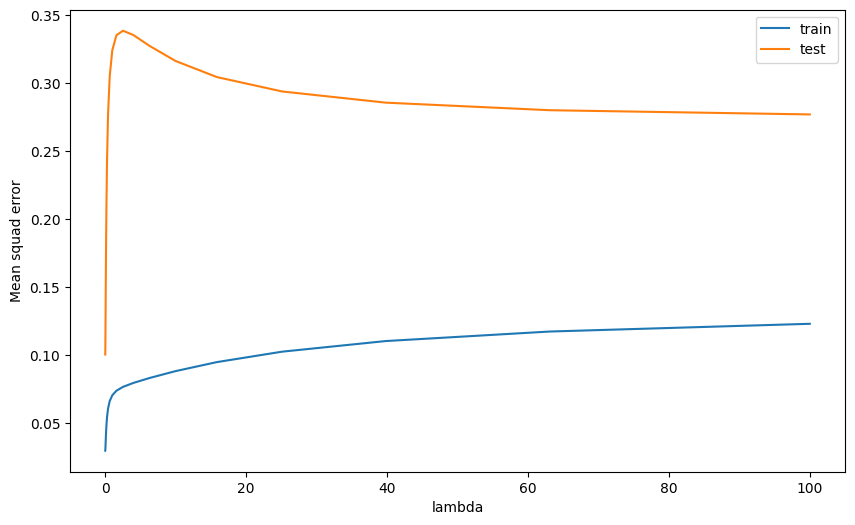

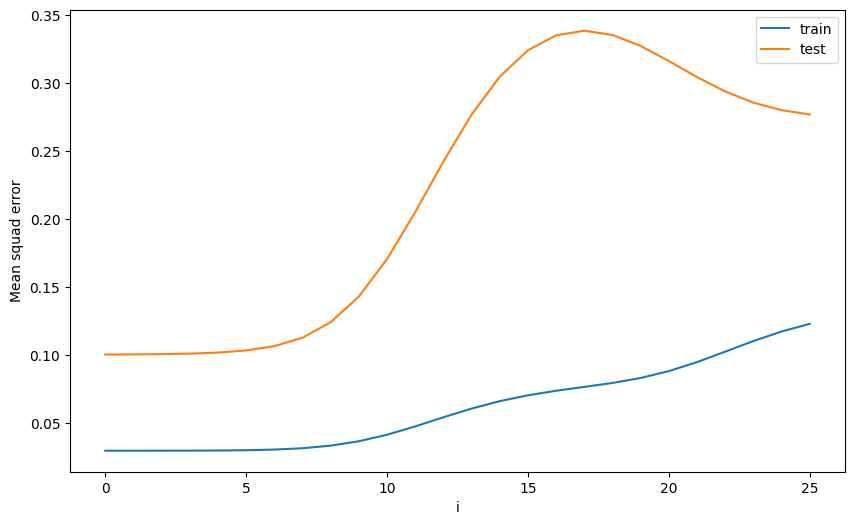

In [46]:
linear = LinearRegression()
linear.fit(x_train, y_train)

print('MSE train ', mean_squared_error(y_train, linear.predict(x_train)))
print('MSE test ', mean_squared_error(y_test, linear.predict(x_test)))

i_arr = range(0, 26)
lamda_arr = [10**(-3 + 0.2*i) for i in i_arr]

test_mse = []
train_mse = []
for lamda in lamda_arr:
    ridge = Ridge(alpha=lamda, random_state=0)
    ridge.fit(x_train, y_train)
    test_mse.append(mean_squared_error(y_test, ridge.predict(x_test)))
    train_mse.append(mean_squared_error(y_train, ridge.predict(x_train)))

plt.figure(figsize=(10,6))
plt.plot(lamda_arr, train_mse, label='train')
plt.plot(lamda_arr, test_mse, label='test')
plt.xlabel('lambda')
plt.ylabel('Mean squad error')
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(i_arr, train_mse, label='train')
plt.plot(i_arr, test_mse, label='test')
plt.xlabel('i')
plt.ylabel('Mean squad error')
plt.legend()
plt.show()